In [26]:
import random
import matplotlib.pyplot as plt
import numpy as np

## Play the game

In [15]:
def setup_bertrands_paradox():

    boxes = ["GG", "SS", "GS"]
    # Pick a box & gold at random until you have one golden coin
    while True:
        first_box = random.choice(boxes)
        coin = random.choice("GS")
        if coin == "G":
            break
    return boxes, first_box

def apply_strategy(boxes, first_box, strategy = 'switch'):
    
    if strategy == "stick":
        second_coin = "S" if first_box == "GS" else "G"
    else:
        # Pick a random box from the 2 remaining boxes
        boxes.remove(first_box)
        second_box = random.choice(boxes)
        second_coin = random.choice(second_box)
    return second_coin

boxes, first_box = setup_bertrands_paradox()
strategy = input("Would you like to 'stick' or 'switch'?\n")
second_coin = apply_strategy(boxes, first_box, strategy = strategy)
    
print(f"Your second coin was {'Golden' if second_coin == 'G' else 'Silver'}!")

Would you like to 'stick' or 'switch'?
switch
Your second coin was Golden!


## Simulate the game

In [20]:
def simulate_bertrands_paradox(num_iterations, strategy = "stick"):
    second_coins = list()
    for iter in range(num_iterations):
        boxes, first_box = setup_bertrands_paradox()
        second_coin = apply_strategy(boxes, first_box, strategy = strategy)
        second_coins.append(second_coin)
    return second_coins

#### Perform simulation

In [28]:
num_iterations = 10 ** 4
prizes = dict()

for strategy in ["switch", "stick"]:
    second_coins = simulate_bertrands_paradox(num_iterations, strategy = strategy)
    prizes[strategy] = [second_coin == "G" for second_coin in second_coins]

#### Visualize results

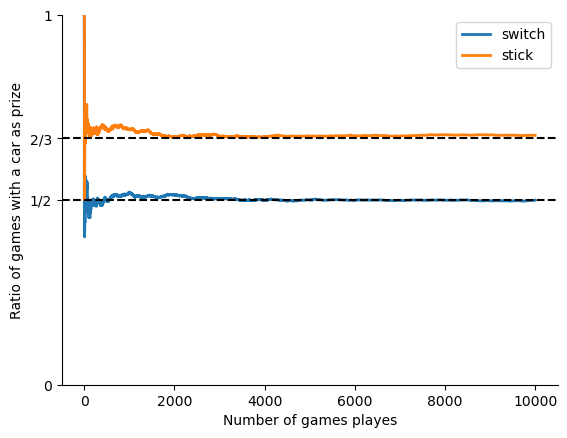

In [33]:
fig, ax = plt.subplots()
for strategy in ['switch', 'stick']:
    ax.plot(np.cumsum(prizes[strategy]) / np.arange(1, len(prizes[strategy]) + 1), label = strategy, lw = 2)
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim([0, 1])
ax.set_xlabel("Number of games playes")
ax.set_ylabel("Ratio of games with a car as prize")
ax.axhline(1/2, color = 'k', ls = '--')
ax.axhline(2/3, color = 'k', ls = '--')
ax.set_yticks([0, 1/2, 2/3, 1])
ax.set_yticklabels([0, '1/2', '2/3', 1])
ax.legend();